<a href="https://colab.research.google.com/github/Vinicius-Ikehara/Deep-Learning-com-PyTorch/blob/main/5_Arquiteturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

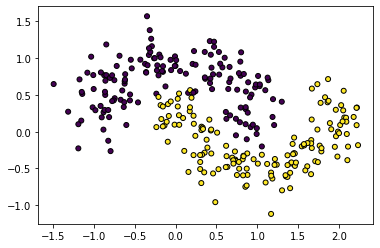

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1,Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:,0],X1[:,1], marker='o',c=Y1, s=25, edgecolor='k')

#Dados com classificação não linearmente separavel


In [6]:
import torch 
from torch import nn

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features= hidden_size), #Escondida 
                              nn.ReLU(), #Ativação não Linear
                              nn.Linear(in_features = hidden_size , out_features = output_size)) #Output

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [7]:
from torchsummary import summary 
summary(net, input_size=(1, input_size))

RuntimeError: ignored

In [22]:
print(X1.dtype)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

print(X1.shape)

float64
torch.Size([300, 1])
(300, 2)


In [23]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('gpu')

In [24]:
class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede,self).__init__()
  
    #Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size,output_size)
  
  def forward(self,X):
    #Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output

In [27]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size, hidden_size, output_size)
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [28]:
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred = net(tensor)
print(pred.size())

print(X1.shape)

torch.Size([300, 1])
(300, 2)
